In [585]:
import numpy as np
import pandas as pd
from datetime import datetime

# Visualisation
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# data
import yfinance as yf
import pandas_datareader as pdr
from pandas_datareader.data import DataReader

sns.set(color_codes = True)
pd.set_option('display.max_rows', 50)

In [586]:
# Check version
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.19.2
Pandas:  1.1.5


In [587]:
# Business Question
# To find the correlation between EV stock markets
# To Find daily return percentage
# Correlation with traditional Energy commodities

# May do some price prediction (patterns, candle stick, simple ML) - Later

In [602]:
# GET DATA

# Method 1: using Yfinance
# data = yf.download(tickers='TSLA', start='2020-01-01', end='2021-01-01', interval='5m')

# Method 2: Using Data Reader
# tsla = pdr.DataReader('TSLA', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# tsla
# nio = pdr.DataReader('NIO', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# nio
# xpev = pdr.DataReader('XPEV', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# xpev
# toyota = pdr.DataReader('TYO', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# toyota
# oil = pdr.DataReader('CL=F', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# oil

# Method 3: Using DataReader with for loop
ev_stock_symbols = ['TSLA', 'NIO', 'WKHS', 'XPEV']
trad_vehicles = ['TYO']

now = datetime.now()
start = datetime(curr.year - 1, now.month, now.day)

for sym in ev_stock_symbols:   
    globals()[sym] = DataReader(sym, 'yahoo', start, now)
    
for sym in energy_symbols:   
    globals()[sym] = DataReader(sym, 'yahoo', start, now)
    
oil = pdr.DataReader('CL=F', data_source='yahoo', start=start, end=now)

In [603]:
# Add Name for stocks and concat dataframe

ev_stocks = [TSLA, NIO, WKHS, XPEV]
ev_company_name = ["TSLA", "NIO", "WORKHORSE", "XPENG"]

for stock, company in zip(ev_stocks, ev_company_name):
    stock["Name"] = company
    
stocks = pd.concat(ev_stocks, axis=0)
stocks

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2020-01-17,103.134003,100.632004,101.522003,102.099998,68145500.0,102.099998,TSLA
2020-01-21,109.716003,105.681999,106.050003,109.440002,89017500.0,109.440002,TSLA
2020-01-22,118.900002,111.820000,114.377998,113.912003,156845000.0,113.912003,TSLA
2020-01-23,116.400002,111.120003,112.849998,114.440002,98255000.0,114.440002,TSLA
2020-01-24,114.772003,110.851997,114.125999,112.963997,71768000.0,112.963997,TSLA
...,...,...,...,...,...,...,...
2021-01-11,47.240002,43.599998,46.310001,44.360001,21540000.0,44.360001,XPENG
2021-01-12,54.750000,45.360001,45.549999,54.299999,57973500.0,54.299999,XPENG
2021-01-13,54.759998,50.340000,53.700001,51.660000,28490600.0,51.660000,XPENG


<h2>EDA</h2>

In [604]:
row, col = TSLA.shape
print(f'TSLA has {row} rows and {col} columns')

row, col = NIO.shape
print(f'NIO has {row} rows and {col} columns')

row, col = XPEV.shape
print(f'XPENG has {row} rows and {col} columns')

row, col = WKHS.shape
print(f'WORKHORSE has {row} rows and {col} columns')

TSLA has 252 rows and 7 columns
NIO has 252 rows and 7 columns
XPENG has 98 rows and 7 columns
WORKHORSE has 252 rows and 7 columns


In [609]:
print(f"{TSLA.isnull().sum()}\n")
print(f"{NIO.isnull().sum()}\n")
print(f"{XPEV.isnull().sum()}\n")
print(f"{WKHS.isnull().sum()}\n")
print(f"{stocks.isnull().sum()}\n")

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64



In [610]:
stocks.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name'], dtype='object')

In [611]:
TSLA.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
High,252.0,327.0,195.6,81.0,160.9,302.3,437.8,884.5
Low,252.0,309.1,187.0,70.1,152.4,283.6,420.2,838.8
Open,252.0,318.1,191.1,74.9,157.2,291.9,430.3,856.0
Close,252.0,319.1,192.6,72.2,156.0,296.1,425.8,880.0
Volume,252.0,73042036.1,39573773.5,17357700.0,45029700.0,67145850.0,89010000.0,304694000.0
Adj Close,252.0,319.1,192.6,72.2,156.0,296.1,425.8,880.0


In [547]:
NIO.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
High,252.0,18.5,17.7,2.4,4.0,13.0,27.4,67.0
Low,252.0,17.0,16.3,2.1,3.8,11.9,25.5,62.2
Open,252.0,17.8,17.1,2.3,3.9,12.5,26.3,64.9
Close,252.0,17.9,17.1,2.4,3.9,12.8,26.7,62.7
Volume,252.0,112831944.8,94334011.7,13699000.0,50472050.0,78593450.0,136682525.0,577185100.0
Adj Close,252.0,17.9,17.1,2.4,3.9,12.8,26.7,62.7
Daily Return,251.0,0.0,0.1,-0.2,-0.0,0.0,0.0,0.2


In [549]:
WKHS.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
High,252.0,13.4,9.7,1.6,3.1,16.5,22.1,31.0
Low,252.0,12.1,8.8,1.3,2.9,15.0,20.4,28.0
Open,252.0,12.7,9.3,1.4,3.0,15.8,21.1,31.0
Close,252.0,12.8,9.3,1.5,3.0,15.7,21.2,30.6
Volume,252.0,15031319.0,21321470.5,590500.0,1742650.0,9883550.0,18951375.0,165502100.0
Adj Close,252.0,12.8,9.3,1.5,3.0,15.7,21.2,30.6
Daily Return,251.0,0.0,0.1,-0.2,-0.0,-0.0,0.0,0.5


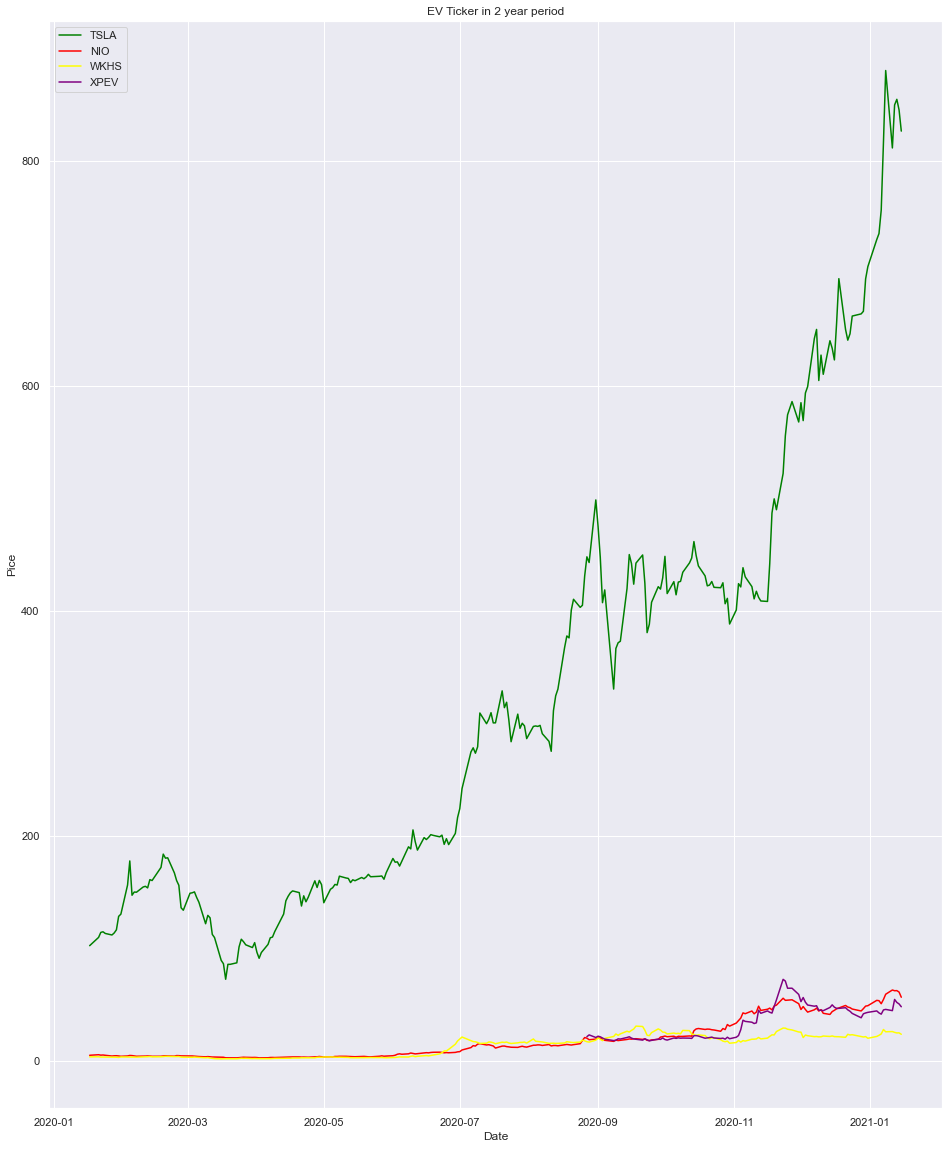

In [617]:
plt.figure(figsize=(16,20))

plt.title('EV Ticker in 2 year period')
plt.xlabel('Date')
plt.ylabel('Pice')



colors = ['green', 'red', 'yellow', 'purple']

for index, ev in enumerate(ev_stocks):
    _, = plt.plot(ev.index, ev.Close, color=colors[index])
    _.set_label(ev_stock_symbols[index])
    
plt.legend()

# Maybe divide TSLA Close price so prices are closer to other stocks
# plt.plot(TSLA.index, tsla.Close/7, color='green')
# plt.plot(nio.index, nio.Close, color='red')
# plt.plot(xpeng.index, xpeng.Close, color='yellow')
# plt.plot(toyota.index, toyota.Close, color='brown')
# plt.plot(oil.index, oil.Close, color='purple')

plt.show()

In [550]:
XPEV.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
High,98.0,35.2,15.9,18.0,20.5,30.6,47.9,74.5
Low,98.0,31.8,13.6,17.1,19.4,26.6,43.6,63.0
Open,98.0,33.5,14.7,17.8,20.1,27.2,46.0,72.2
Close,98.0,33.5,14.9,17.5,19.9,30.1,45.0,72.2
Volume,98.0,25595598.0,27704182.7,2789400.0,6058175.0,19534800.0,31991525.0,166146200.0
Adj Close,98.0,33.5,14.9,17.5,19.9,30.1,45.0,72.2
Daily Return,97.0,0.0,0.1,-0.1,-0.0,-0.0,0.0,0.3


In [522]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-17 to 2021-01-15
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Name       252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


In [523]:
XPEV.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2020-08-27 to 2021-01-15
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       98 non-null     float64
 1   Low        98 non-null     float64
 2   Open       98 non-null     float64
 3   Close      98 non-null     float64
 4   Volume     98 non-null     int64  
 5   Adj Close  98 non-null     float64
 6   Name       98 non-null     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 6.1+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1465e2c10>,
 'caps': [<matplotlib.lines.Line2D at 0x14664c2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1465e28b0>,
 'medians': [<matplotlib.lines.Line2D at 0x14664c760>,
 'fliers': [<matplotlib.lines.Line2D at 0x14664ca90>,
 'means': []}

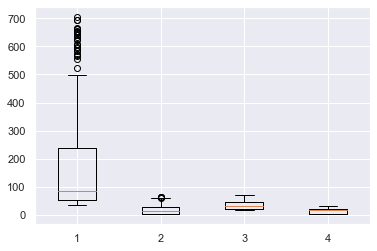

In [583]:
plt.boxplot([tsla.Close, NIO.Close, XPEV.Close, WKHS.Close])

<h2>The correlation between different EV stocks closing prices</h2>

In [584]:
plt.figure(figsize=(10,12))
# Method 1: Concat close column
# close_prices = pd.concat(
#                     [
#                         tsla[["Close"]].rename(columns={'Close':'tsla_close'}), 
#                         nio[["Close"]].rename(columns={'Close':'nio_close'}),
#                         xpeng[["Close"]].rename(columns={'Close':'expeng_close'}),
#                         toyota[["Close"]].rename(columns={'Close':'toyota_close'}),
#                         oil[["Close"]].rename(columns={'Close':'oil_close'})
#                     ], 
#                         axis=1)

# Method 2:
closing_prices = DataReader(ev_stock_symbols, data_source='yahoo', start=start, end=now)['Adj Close']
closing_prices.head()

Symbols,TSLA,NIO,WKHS,XPEV
Date,,,,
2020-01-17,102.099998,4.67,3.29,NaN
2020-01-21,109.440002,5.17,3.34,NaN
2020-01-22,113.912003,4.79,3.11,NaN
2020-01-23,114.440002,4.92,3.15,NaN
2020-01-24,112.963997,4.66,3.09,NaN


<Figure size 720x864 with 0 Axes>

In [619]:
# Find percentage change per day for closing prices
daily_return_percentage = closing_prices.pct_change()
daily_return_percentage

Symbols,TSLA,NIO,WKHS,XPEV
Date,,,,
2020-01-17,NaN,NaN,NaN,NaN
2020-01-21,0.071890,0.107066,0.015198,NaN
2020-01-22,0.040863,-0.073501,-0.068862,NaN
2020-01-23,0.004635,0.027140,0.012862,NaN
2020-01-24,-0.012898,-0.052846,-0.019048,NaN
...,...,...,...,...
2021-01-11,-0.078214,0.064155,0.007628,-0.023982
2021-01-12,0.047153,-0.010526,-0.028727,0.224076
2021-01-13,0.005851,0.001773,-0.019185,-0.048619


/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


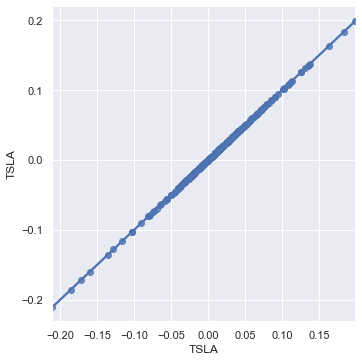

In [527]:
# Compare the stock itself to find linear 
sns.lmplot('TSLA', 'TSLA', data=daily_return_percentage)

/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


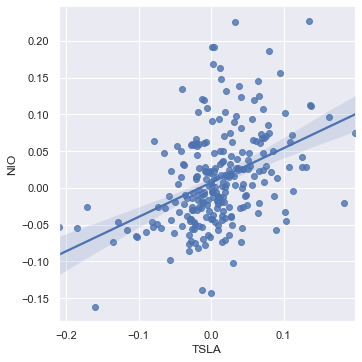

In [528]:
sns.lmplot('TSLA', 'NIO', data=daily_return_percentage)

/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


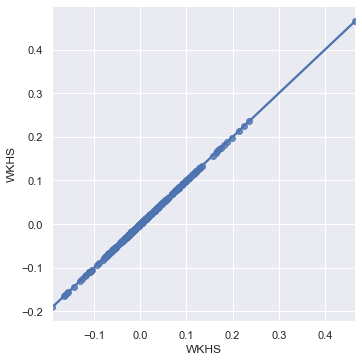

In [529]:
sns.lmplot('WKHS', 'WKHS', data=daily_return_percentage)

/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


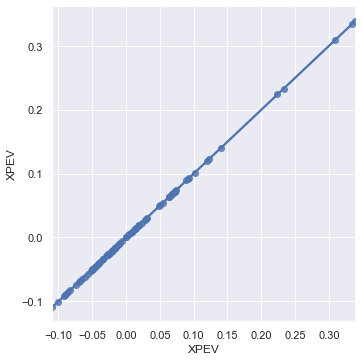

In [530]:
sns.lmplot('XPEV', 'XPEV', data=daily_return_percentage)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

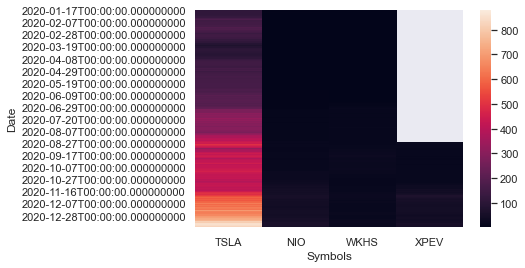

In [531]:
sns.heatmap(close_prices)

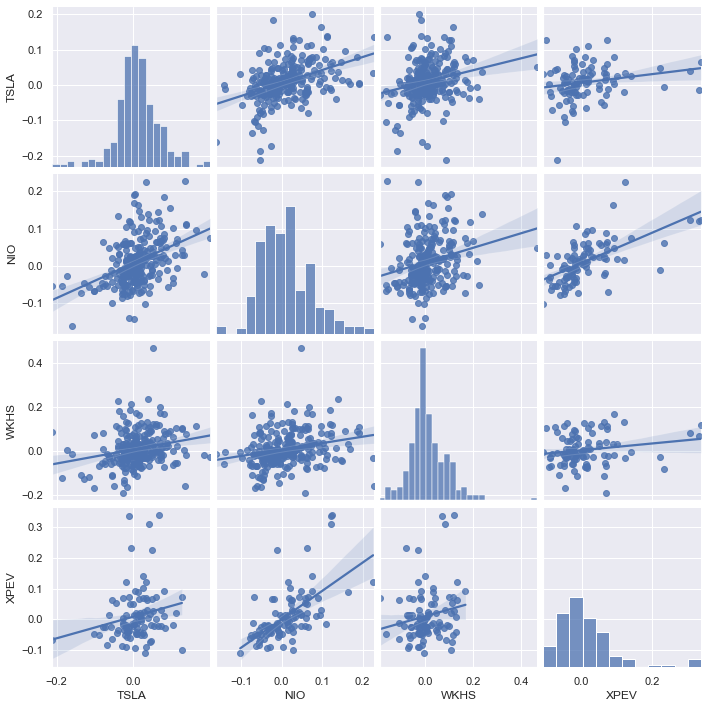

In [532]:
sns.pairplot(data=daily_return_percentage, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

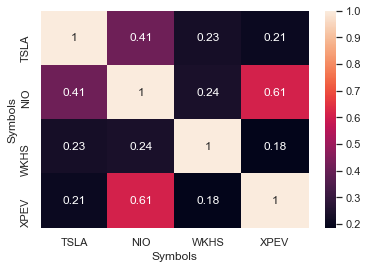

In [533]:
sns.heatmap(daily_return_percentage.corr(), annot=True)

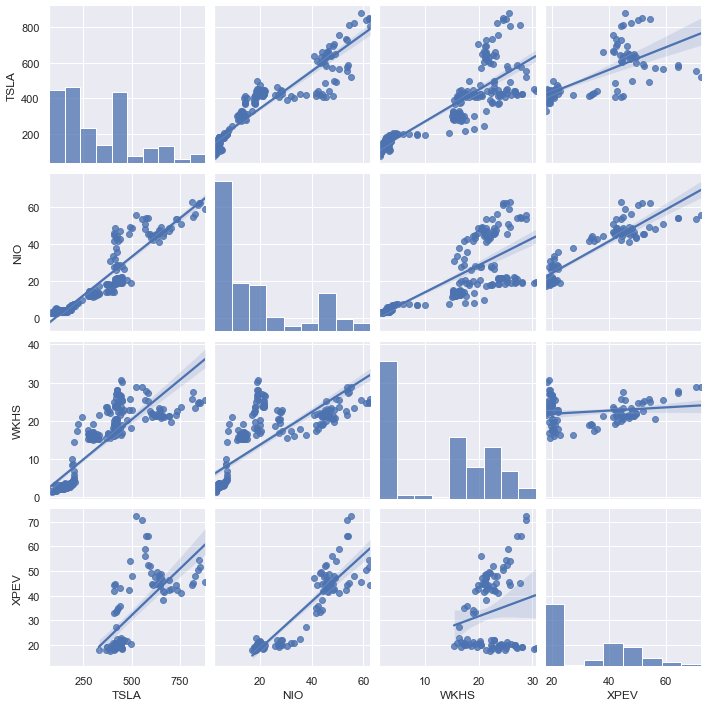

In [534]:
sns.pairplot(data=closing_prices, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

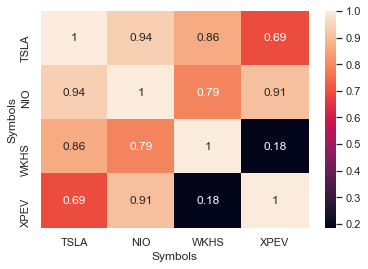

In [535]:
sns.heatmap(closing_prices.corr(), annot=True)

<h3>CONCLUSION</h3>
<p>Daily return percentage of EV stocks are not quite relevant. However, TSLA and NIO, TSLA and WKHS, NIO and WKHS, NIO and XPEV show a correlation in closing prices</p>

<h2>Daily Return</h2>

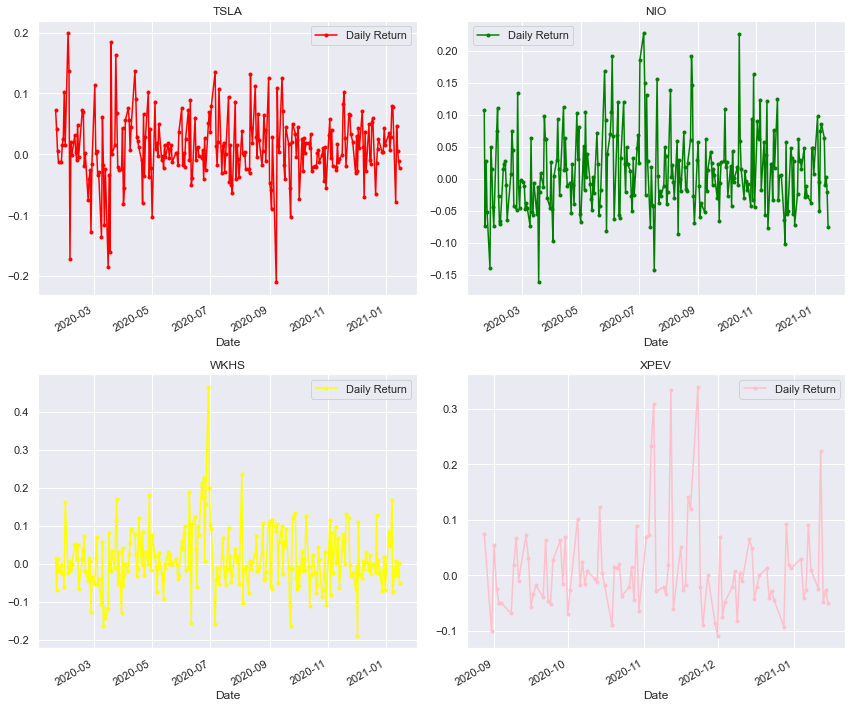

In [536]:
# We'll use pct_change to find the percent change for each day
for ev in ev_stocks:
    ev['Daily Return'] = ev['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(12)

TSLA['Daily Return'].plot(ax=axes[0,0], linestyle='-', marker='.', legend=True, color='red')
axes[0,0].set_title('TSLA')

NIO['Daily Return'].plot(ax=axes[0,1], linestyle='-', marker='.', legend=True, color='green')
axes[0,1].set_title('NIO')

WKHS['Daily Return'].plot(ax=axes[1,0], linestyle='-', marker='.', legend=True, color='yellow')
axes[1,0].set_title('WKHS')

XPEV['Daily Return'].plot(ax=axes[1,1], linestyle='-', marker='.', legend=True, color='pink')
axes[1,1].set_title('XPEV')

fig.tight_layout()

/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

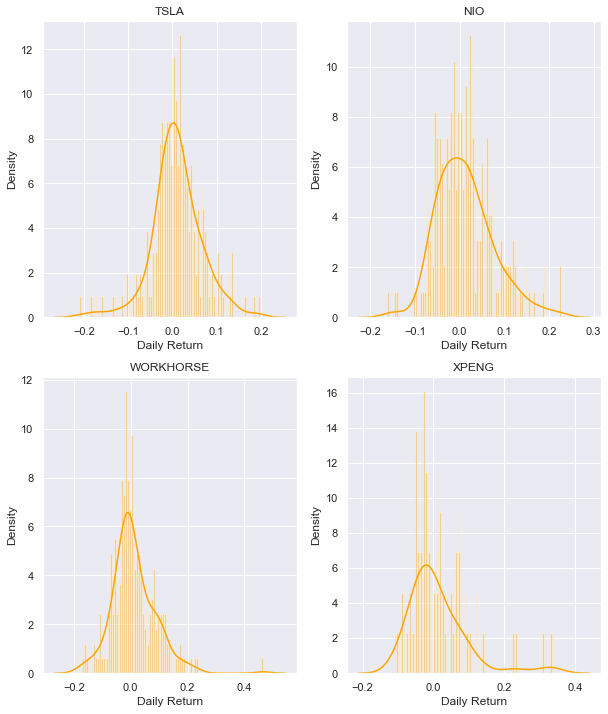

In [537]:
plt.figure(figsize=(10,12))

row = col = 2

for i, company in enumerate(ev_stocks, 1):
    plt.subplot(row, col, i)
    sns.distplot(company['Daily Return'], bins=100, color='orange')
    plt.title(f"{ev_company_name[i - 1]}")

<h1>Compare with Traditional Vehicle</h1>

In [589]:
ev_tradv_closing_prices = DataReader(['TSLA', 'TYO'], data_source='yahoo', start=start, end=now)['Adj Close']
ev_tradv_closing_prices.head()

Symbols,TSLA,TYO
Date,,
2020-01-17,102.099998,10.782331
2020-01-21,109.440002,10.662749
2020-01-22,113.912003,10.642819
2020-01-23,114.440002,10.553132
2020-01-24,112.963997,10.443515


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

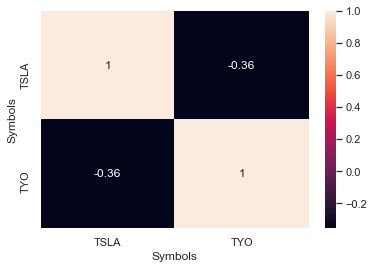

In [590]:
sns.heatmap(ev_tradv_closing_prices.corr(), annot=True)

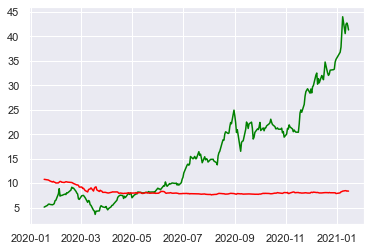

In [594]:
plt.plot(ev_tradv_closing_prices.index, ev_tradv_closing_prices["TSLA"]/20, color='green')
plt.plot(ev_tradv_closing_prices.index, ev_tradv_closing_prices["TYO"], color='red')

<h1>TSLA Vs OIL</h1>

In [600]:
ev_oil_closing_prices = DataReader(['TSLA', 'CL=F'], data_source='yahoo', start=start, end=now)['Adj Close']
ev_oil_closing_prices

Symbols,TSLA,CL=F
Date,,
2020-01-17,102.099998,58.540001
2020-01-21,109.440002,58.340000
2020-01-22,113.912003,56.740002
2020-01-23,114.440002,55.590000
2020-01-24,112.963997,54.189999
...,...,...
2021-01-12,849.440002,53.209999
2021-01-13,854.409973,52.910000
2021-01-14,845.000000,53.570000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

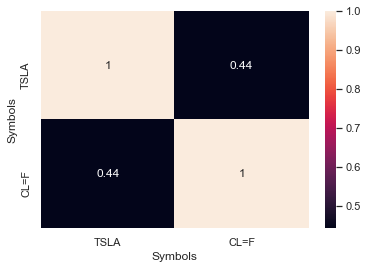

In [601]:
sns.heatmap(ev_oil_closing_prices.corr(), annot=True)